# Simple Linear Regression

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
data=pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.shape

(21613, 21)

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
#correlation matrix
corrm=data.corr()
corrm

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


<function matplotlib.pyplot.show(close=None, block=None)>

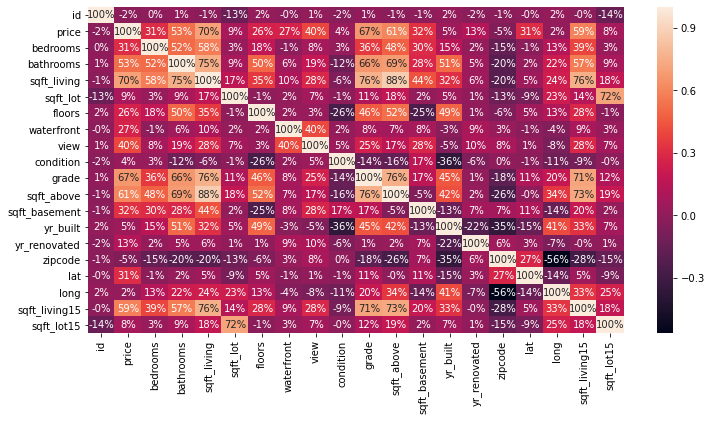

In [7]:
#plot of correlation matrix
plt.figure(figsize=(12,6))
sn.heatmap(corrm,annot=True,fmt='.0%')
plt.show

#Inference: sqft_living, sqft_above, grade, bathroom and bedrooms has significantly more correlation with the price than other features 

Text(0, 0.5, 'price')

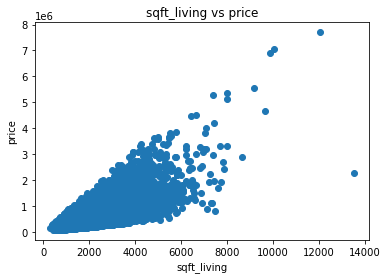

In [8]:
#scatter plot to check linearity
x=data['sqft_living']
y=data['price']

plt.scatter(x,y)
plt.title('sqft_living vs price')
plt.xlabel('sqft_living')
plt.ylabel('price')

Text(0, 0.5, 'price')

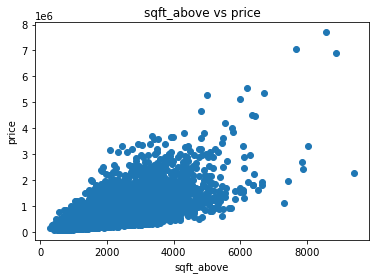

In [9]:
x=data['sqft_above']
y=data['price']

plt.scatter(x,y)
plt.title('sqft_above vs price')
plt.xlabel('sqft_above')
plt.ylabel('price')

<AxesSubplot:xlabel='sqft_living'>

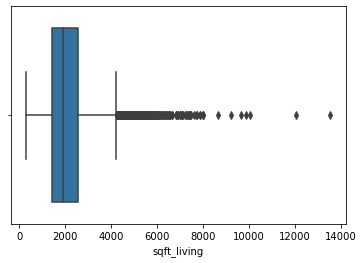

In [11]:
sn.boxplot(x=data['sqft_living'])

<AxesSubplot:xlabel='sqft_above'>

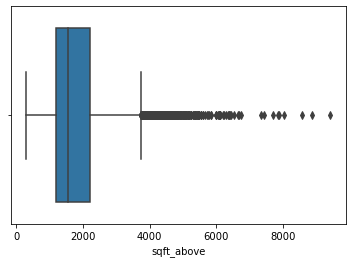

In [12]:
sn.boxplot(x=data['sqft_above'])

In [13]:
kc_q1= data.quantile(0.25)
kc_q2= data.quantile(0.75)
kc_iqr=kc_q2-kc_q1
min_outlier=kc_q1-(1.5*kc_iqr)
max_outlier=kc_q2+(1.5*kc_iqr)

In [14]:
#datapoints with true indicates the presence of outliers
print((data < min_outlier) | (data > max_outlier))

       bathrooms  bedrooms  condition   date  floors  grade     id    lat  \
0          False     False      False  False   False  False  False  False   
1          False     False      False  False   False  False  False  False   
2          False     False      False  False   False  False  False  False   
3          False     False      False  False   False  False  False  False   
4          False     False      False  False   False  False  False  False   
...          ...       ...        ...    ...     ...    ...    ...    ...   
21608      False     False      False  False   False  False  False  False   
21609      False     False      False  False   False  False  False  False   
21610      False     False      False  False   False  False  False  False   
21611      False     False      False  False   False  False  False  False   
21612      False     False      False  False   False  False  False  False   

        long  price  ...  sqft_basement  sqft_living  sqft_living15  sqft_l

In [15]:
#datset after removing rows with outliers
data2= data[~((data < (min_outlier))|( data> (max_outlier))).any(axis=1)]
data2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [16]:
data2.shape

(14934, 21)

Text(0, 0.5, 'price')

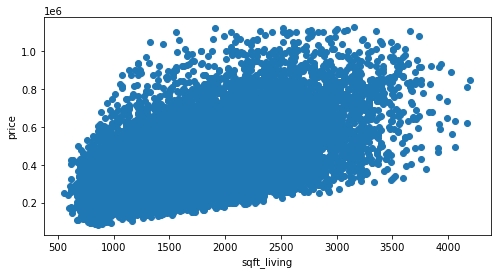

In [17]:
x=data2['sqft_living']
y=data2['price']
plt.figure(figsize=(8,4))
plt.scatter(x,y)
plt.xlabel('sqft_living')
plt.ylabel('price')

Text(0, 0.5, 'price')

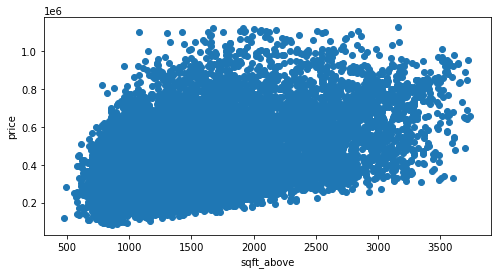

In [18]:
x=data2['sqft_above']
y=data2['price']
plt.figure(figsize=(8,4))
plt.scatter(x,y)
plt.xlabel('sqft_above')
plt.ylabel('price')


In [19]:
# here we try to predict house prices using its single attribute sqft_living
X = data2['sqft_living']
print("Independent Variable:\n",X.head())
y=data2['price']
print("\nDependent Variable:\n",y.head())

Independent Variable:
 0    1180
2     770
3    1960
4    1680
6    1715
Name: sqft_living, dtype: int64

Dependent Variable:
 0    221900.0
2    180000.0
3    604000.0
4    510000.0
6    257500.0
Name: price, dtype: float64


In [20]:
#splitting data in 70:30 for training and testing
x_train=X[:9731]
x_test=X[9731:]
y_train=y[:9731]
y_test=y[9731:]

In [21]:
#mean of sqft_living
mean_sqft= sum(data2['sqft_living'])/float(len(data2['sqft_living']))
print("Mean sqft_living = ",mean_sqft)

Mean sqft_living =  1814.1489219231285


In [22]:
#mean of price
mean_price= sum(data2['price'])/float(len(data2['price']))
print("Mean price = ",mean_price)

Mean price =  438530.17001473147


In [23]:
def variance(values, mean):
    return sum([(val-mean)**2 for val in values])

In [24]:
def covariance(x, mean_sqft, y , mean_price):
    covariance = 0.0
    for r in range(len(x)):
        covariance = covariance + (x[r] - mean_sqft) * (y[r] - mean_price)
    return covariance

In [25]:
variance_sqft= variance(data2['sqft_living'],mean_sqft)
print("variance of sqft_living = ", variance_sqft)

variance of sqft_living =  5641490352.797684


In [26]:
variance_price = variance(data2['price'],mean_price)
print("variance of price = ", variance_price) 

variance of price =  485427349394977.7


In [27]:
d=np.array(data2['sqft_living'])
f=np.array(data2['price'])
covariance = covariance(d,mean_sqft,f,mean_price)
covariance

851442265057.8821

In [28]:
#calculating the slope and intercept
m=covariance/variance_sqft
c=mean_price-m*mean_sqft
print("m =",m)
print("c =",c)

m = 150.92505912655537
c = 164729.63670910662


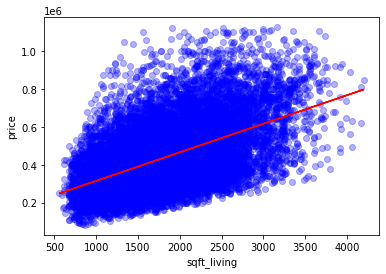

In [29]:
#residual plot
plt.xlabel('sqft_living')
plt.ylabel('price')
x=data2['sqft_living']
y=data2['price']
plt.scatter(x,y,color='blue',alpha=0.3)
plt.plot(x, m*x + c,color='red')

In [30]:
def calculate(x):
    return (m*x)+c

In [31]:
#predicting house prices based on sqft_living
pred_p1=m*data2['sqft_living']+c
pred_p1

0        342821.206478
2        280941.932237
3        460542.752597
4        418283.736042
6        423566.113111
             ...      
21608    395644.977173
21609    513366.523291
21610    318673.197018
21611    406209.731312
21612    318673.197018
Name: sqft_living, Length: 14934, dtype: float64

In [32]:
pred_price= calculate(data2['sqft_living'])
pred_price

0        342821.206478
2        280941.932237
3        460542.752597
4        418283.736042
6        423566.113111
             ...      
21608    395644.977173
21609    513366.523291
21610    318673.197018
21611    406209.731312
21612    318673.197018
Name: sqft_living, Length: 14934, dtype: float64

In [33]:
pred_p=np.array(pred_price)

In [34]:
Predicted_price = pd.DataFrame(pred_p,columns=['Predicted_Price'])
Predicted_price

,Predicted_Price
0,342821.206478
1,280941.932237
2,460542.752597
3,418283.736042
4,423566.113111
...,...
14929,395644.977173
14930,513366.523291
14931,318673.197018
14932,406209.731312


In [35]:
Actual_price = pd.DataFrame(data2['price'])
Actual_price = Actual_price.reset_index(drop=True)
Actual_price

,price
0,221900.0
1,180000.0
2,604000.0
3,510000.0
4,257500.0
...,...
14929,360000.0
14930,400000.0
14931,402101.0
14932,400000.0


In [36]:
#Comparing actual price and predicted price
compare= pd.concat([Actual_price,Predicted_price],axis=1)
compare

,price,Predicted_Price
0,221900.0,342821.206478
1,180000.0,280941.932237
2,604000.0,460542.752597
3,510000.0,418283.736042
4,257500.0,423566.113111
...,...,...
14929,360000.0,395644.977173
14930,400000.0,513366.523291
14931,402101.0,318673.197018
14932,400000.0,406209.731312


In [39]:
#calculating mean squared error and root mean squred error
diff= data2['price']-pred_price
diff = diff*diff
diff

0        1.462194e+10
2        1.018927e+10
3        2.057998e+10
4        8.411873e+09
6        2.757795e+10
             ...     
21608    1.270564e+09
21609    1.285197e+10
21610    6.960198e+09
21611    3.856076e+07
21612    4.002844e+07
Length: 14934, dtype: float64

In [40]:
import math
diff_sum=sum(diff)/len(diff)
diff_sum=math.sqrt(diff_sum)
print("root mean squared error : ",diff_sum)

root mean squared error :  154596.41622068963


In [41]:
a=data2['price']-pred_price
a=a**2
mse= sum(a)/len(a)
print('Mean squared error: ',mse)

Mean squared error:  23900051908.280704


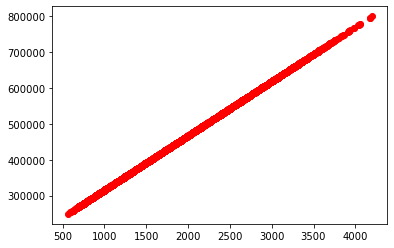

In [42]:
plt.scatter(data2['sqft_living'],pred_price,color='red')

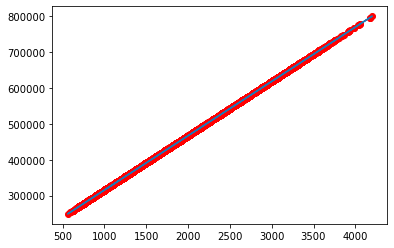

In [43]:
plt.scatter(data2['sqft_living'],pred_price,color='red')
plt.plot(data2['sqft_living'],pred_price)

Text(0.5, 1.0, 'Test(Blue) vs pred(Red)')

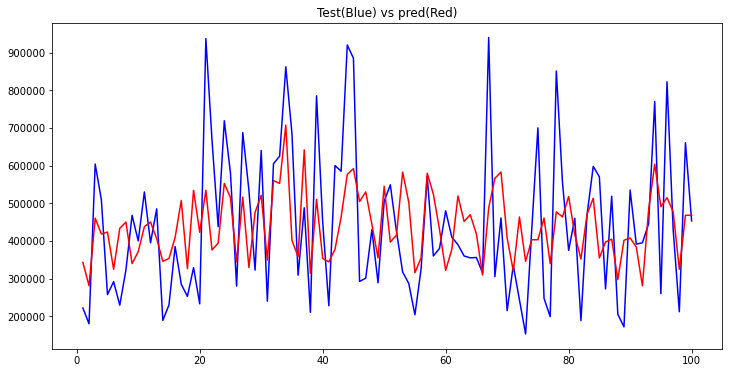

In [44]:
a=np.array(data2['price'])
b=np.array(pred_price)
c = [i for i in range(1,101,1)]
plt.figure(figsize=(12,6))
plt.plot(c, a[:100],color = 'Blue')
plt.plot(c, b[:100],color = 'red')
plt.title('Test(Blue) vs pred(Red)')

# Multiple Linear Regression

In [45]:
#importing library required to plot a 3D graph
from mpl_toolkits.mplot3d import Axes3D

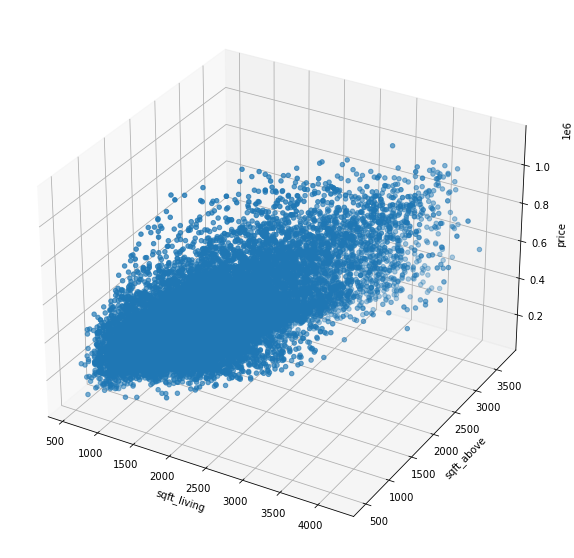

In [46]:
#sqft_living and sqft_above are two features considered here for price prediction
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection = '3d')

x = data2['sqft_living']
y = data2['sqft_above']
z = data2['price']

ax.set_xlabel("sqft_living")
ax.set_ylabel("sqft_above")
ax.set_zlabel("price")

ax.scatter(x, y, z)

plt.show()

In [47]:
# separate datframes  for features and target
d = {'sqft_living': data2['sqft_living'], 'sqft_above': data2['sqft_above']}
X = pd.DataFrame(data=d)
print("Independent Variables:\n",X.head())
f={'price':data2['price']}
y=pd.DataFrame(data=f)
print("\nDependent Variable:\n",y.head())

Independent Variables:
    sqft_living  sqft_above
0         1180        1180
2          770         770
3         1960        1050
4         1680        1680
6         1715        1715

Dependent Variable:
       price
0  221900.0
2  180000.0
3  604000.0
4  510000.0
6  257500.0


In [48]:
#splitting data for traning and testing
x_train=X[:9731]
x_test=X[9731:]
y_train=y[:9731]
y_test=y[9731:]

In [49]:
print(x_train.shape)
print(x_test.shape)

(9731, 2)
(5203, 2)


In [50]:
print(y_train.shape)
print(y_test.shape)

(9731, 1)
(5203, 1)


In [51]:
x1_train= x_train['sqft_living']
x2_train= x_train['sqft_above']

In [54]:
#calculate mean of both the features and the target to be used in formula
mean_x1= sum(x1_train)/ float(len(x1_train))
print('Mean of sqft_living:',mean_x1)
mean_x2= sum(x2_train)/ float(len(x2_train))
print('Mean of sqft_above:',mean_x2)
mean_price = sum(y_train['price'])/float(len(y_train['price']))
print("mean of price:",mean_price)

Mean of sqft_living: 1782.183948206762
Mean of sqft_above: 1543.1721303052102
mean of price: 432512.44887473027


In [55]:
#using formula for 2 variable to find intercepts b1 and b2 and slope a
X1=(list)(x1_train)
X2=(list)(x2_train)
y=(list)(y_train['price'])
total_no_values=len(X1) 
x2sqr=0
x1sqr=0
x1x2=0
x2y=0
x1y=0

In [56]:
for i in range(total_no_values):
    x2sqr+=(X2[i]**2)
    x1sqr+=(X1[i]**2)
    x1x2+=(X1[i]*X2[i])
    x2y+=(X2[i]*y[i])
    x1y+=(X1[i]*y[i])
    
b1 = ((x2sqr*x1y) - (x1x2*x2y))/((x1sqr*x2sqr)-(x1x2**2))
b2 = ((x1sqr*x2y) - (x1x2*x1y))/((x1sqr*x2sqr)-(x1x2**2))
a =mean_price - (b1*mean_x1)-(b2*mean_x2)

In [57]:
print("b1 intercept =",b1)
print("b2 intercept =",b2)
print("intercept a =",a)
print("line of regression: y=",b1,"*x1 +",b2,"*x2 + ",a)

b1 intercept = 224.58896020303547
b2 intercept = 10.472555459756435
intercept a = 16092.653337861399
line of regression: y= 224.58896020303547 *x1 + 10.472555459756435 *x2 +  16092.653337861399


In [58]:
#predicting house prices based on two features
def predict(b1,b2,a,X):
    return ((b1*X['sqft_living']) + (b2*X['sqft_above']) + a)

In [59]:
pred_y=predict(b1,b2,a,x_test)
pred_y

14256    373386.157145
14257    309919.547916
14258    659311.982173
14259    328724.469169
14260    413602.718873
             ...      
21608    375736.772302
21609    559084.754519
21610    255855.399314
21611    392191.078398
21612    255855.399314
Length: 5203, dtype: float64

In [60]:
pred_p=np.array(pred_y)
Predicted_price = pd.DataFrame(pred_p,columns=['Predicted_Price'])
Predicted_price

,Predicted_Price
0,373386.157145
1,309919.547916
2,659311.982173
3,328724.469169
4,413602.718873
...,...
5198,375736.772302
5199,559084.754519
5200,255855.399314
5201,392191.078398


In [61]:
Actual_price = pd.DataFrame(y_test['price'])
Actual_price = Actual_price.reset_index(drop=True)
Actual_price

,price
0,375000.0
1,295000.0
2,760000.0
3,347000.0
4,712000.0
...,...
5198,360000.0
5199,400000.0
5200,402101.0
5201,400000.0


In [62]:
compare= pd.concat([Actual_price,Predicted_price],axis=1)
compare

,price,Predicted_Price
0,375000.0,373386.157145
1,295000.0,309919.547916
2,760000.0,659311.982173
3,347000.0,328724.469169
4,712000.0,413602.718873
...,...,...
5198,360000.0,375736.772302
5199,400000.0,559084.754519
5200,402101.0,255855.399314
5201,400000.0,392191.078398


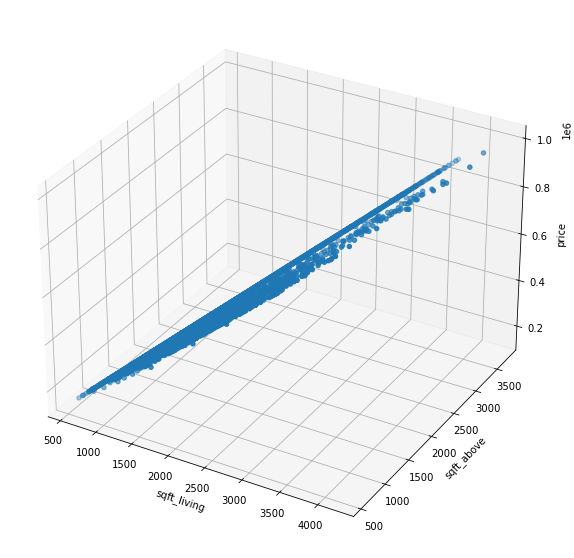

In [63]:
#3D scatter plot of predicted price with its features
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection = '3d')

x = x_test['sqft_living']
y = x_test['sqft_above']
z = Predicted_price

ax.set_xlabel("sqft_living")
ax.set_ylabel("sqft_above")
ax.set_zlabel("price")

ax.scatter(x, y, z)

plt.show()

In [64]:
#calculating mean squared error and root mean squared error
a=y_test['price']-pred_y
a=a**2
mse= sum(a)/len(a)
print('Mean squared error: ',mse)

Mean squared error:  26218687270.167168


In [65]:
print('Root mean squared error: ', math.sqrt(mse))

Root mean squared error:  161921.8554431957


# Multivariate linear regression 

In [66]:
#with 3 features and 1 target variable using matrix
x1 = data2['sqft_living'][:9731]
x1_test = data2['sqft_living'][9731:]
x2 = data2['sqft_above'][:9731]
x2_test = data2['sqft_above'][9731:]
x3 = data2['grade'][:9731]
x3_test = data2['grade'][9731:]

y = data2['price'][:9731]
y_test = data2['price'][9731:]

In [67]:
#matrix of features
X = np.matrix((np.ones(len(x1)),x1,x2,x3))

In [68]:
X.shape

(4, 9731)

In [69]:
#Transpose of feature matrix
X = np.array(X)
Xt = X.transpose()
print(Xt)

[[1.00e+00 1.18e+03 1.18e+03 7.00e+00]
 [1.00e+00 7.70e+02 7.70e+02 6.00e+00]
 [1.00e+00 1.96e+03 1.05e+03 7.00e+00]
 ...
 [1.00e+00 1.09e+03 1.09e+03 7.00e+00]
 [1.00e+00 1.83e+03 1.29e+03 8.00e+00]
 [1.00e+00 3.01e+03 3.01e+03 9.00e+00]]


In [70]:
#inverse of target
y_inverse = np.array([y]).T
print(y_inverse)

[[221900.]
 [180000.]
 [604000.]
 ...
 [196000.]
 [572000.]
 [615000.]]


In [71]:
y_inverse.shape

(9731, 1)

In [72]:
D = np.dot(X,Xt)
print(D)

[[9.73100000e+03 1.73424320e+07 1.50166080e+07 7.11590000e+04]
 [1.73424320e+07 3.43169651e+10 2.94065354e+10 1.29663811e+08]
 [1.50166080e+07 2.94065354e+10 2.63169294e+10 1.12608735e+08]
 [7.11590000e+04 1.29663811e+08 1.12608735e+08 5.26363000e+05]]


In [73]:
def inv(m):
    a,b = m.shape
    if a!= b:
        raise ValueError("Only sqauare matrices are invertible")
    i = np.eye(a,a)
    return np.linalg.lstsq(m,i)[0]

inverse = inv(D)
print(inverse)

[[ 1.10044296e-02  3.10707715e-07  7.90622504e-07 -1.73337175e-03]
 [ 3.10707715e-07  8.95488722e-10 -6.41643977e-10 -1.25326845e-07]
 [ 7.90622504e-07 -6.41643977e-10  1.00327214e-09 -1.63459647e-07]
 [-1.73337175e-03 -1.25326845e-07 -1.63459647e-07  3.02077351e-04]]


C:\Users\dipsb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [74]:
val = np.dot(inverse,X)
print(val)

[[ 1.70397038e-04  1.45222340e-03  3.09968130e-04 ...  7.12773179e-05
  -1.27404622e-03 -1.28091216e-03]
 [-2.67043401e-07 -2.45792902e-07  5.14851519e-07 ... -2.89889428e-07
   1.19116586e-07 -5.31612076e-08]
 [ 7.31262091e-08  8.83183081e-08 -5.57781472e-07 ...  4.05796741e-08
  -3.97042087e-07  4.07986460e-07]
 [ 4.04016475e-05 -1.43273242e-04 -3.61035375e-05 ...  6.63924318e-05
   2.43035988e-04  1.16077069e-04]]


In [75]:
ans = np.matmul(val,y)
print(ans)

[-3.18922645e+05  1.25589915e+02 -5.82995401e+01  8.44537118e+04]


In [76]:
#prediction using coefficients
yt = Xt.dot(ans)
yt

array([351655.97997531, 239613.21446793, 457195.05388028, ...,
       345599.84623098, 511330.18709969, 643704.78967641])

In [77]:
#prediction using test dataset
X_test = np.matrix((np.ones(len(x1_test)),x1_test,x2_test,x3_test))
X_test

matrix([[1.00e+00, 1.00e+00, 1.00e+00, ..., 1.00e+00, 1.00e+00, 1.00e+00],
        [1.52e+03, 1.25e+03, 2.76e+03, ..., 1.02e+03, 1.60e+03, 1.02e+03],
        [1.52e+03, 1.25e+03, 2.23e+03, ..., 1.02e+03, 1.60e+03, 1.02e+03],
        [7.00e+00, 6.00e+00, 7.00e+00, ..., 7.00e+00, 8.00e+00, 7.00e+00]])

In [78]:
X_test = X_test.transpose()

In [79]:
y_pred = X_test.dot(ans)
print(y_pred)

[[374534.70745388 271912.59443768 488873.52860725 ... 340889.51998539
  464371.64923206 340889.51998539]]


In [80]:
y_pred_list=y_pred.tolist()

In [81]:
y_pred_list

[[374534.70745388,
  271912.59443767637,
  488873.5286072544,
  446203.24799907615,
  398306.88295443257,
  459170.21982044494,
  632128.3207004329,
  419929.71128303866,
  369919.0911757443,
  340216.61623602395,
  498016.83670054516,
  328777.2524967386,
  415123.84122290905,
  420866.7046129663,
  531662.0241690314,
  478230.08518961514,
  509496.0941678038,
  616115.7359522524,
  402123.7611780388,
  380631.56877327,
  437376.0279929391,
  617861.9044211537,
  244323.54071351764,
  454372.8029589653,
  363768.2474639644,
  427775.55880421324,
  477245.8949717694,
  384628.2636944259,
  602117.3770251197,
  570017.5378831058,
  415570.5652339,
  516185.23793352774,
  383955.35994505615,
  482672.670274673,
  453070.54076817166,
  390684.3974387534,
  394048.9161856021,
  275950.0169338948,
  474124.4623605995,
  260473.23069839104,
  623326.5895662364,
  237594.50321982038,
  516185.23793352774,
  428581.9162103036,
  350310.1724765699,
  461007.13048521016,
  532334.9279184012,
  3

In [82]:
y_test = np.matrix(y_test)
y_test_list = y_test.tolist()
y_test_list

[[375000.0,
  295000.0,
  760000.0,
  347000.0,
  712000.0,
  495000.0,
  925000.0,
  775000.0,
  429000.0,
  229000.0,
  625000.0,
  130000.0,
  349000.0,
  487500.0,
  475000.0,
  685000.0,
  960000.0,
  428000.0,
  435000.0,
  385000.0,
  352000.0,
  660000.0,
  105000.0,
  420000.0,
  499950.0,
  665000.0,
  540000.0,
  400000.0,
  469950.0,
  777000.0,
  346500.0,
  685000.0,
  575000.0,
  515000.0,
  300000.0,
  272000.0,
  355000.0,
  223000.0,
  397000.0,
  460000.0,
  848000.0,
  392800.0,
  577000.0,
  570000.0,
  250000.0,
  645000.0,
  337000.0,
  280000.0,
  167000.0,
  280000.0,
  317500.0,
  405500.0,
  495000.0,
  549010.0,
  365000.0,
  412500.0,
  425000.0,
  920000.0,
  340000.0,
  405000.0,
  537100.0,
  353500.0,
  522000.0,
  710000.0,
  329950.0,
  800500.0,
  168500.0,
  490000.0,
  579000.0,
  600000.0,
  445000.0,
  362500.0,
  234000.0,
  660000.0,
  517950.0,
  525000.0,
  319500.0,
  1010000.0,
  475000.0,
  375000.0,
  405000.0,
  420000.0,
  775000.0,
  8

In [84]:
#calculation rmse
n = len(y_test)

mse = 0
for i in range(n):
  mse = mse + ((y_test_list[0][i]-y_pred_list[0][i])**2)/n
print('Mean Squared Error:',mse)
print('Root mean squared error: ', math.sqrt(mse))

Mean Squared Error: 216497.15347483847
Root mean squared error:  465.2925461200066
